# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 08__

__Nombres de los estudiantes: Enrique Cavanillas Y Víctor Fernández__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [1]:
import pandas as pd
#Importamos el dataframe
df = pd.read_csv('cleveland.csv')

#Marcamos las variables categóricas
categorias = ['sex','cp','fbs','restecg','exang','slope','thal']
for c in categorias :
    df[c] = df[c].astype('category')
    
#Adaptamos los resultados para diferenciar solo entre sano y enfermo
mapa = {0: 'normal', 1:'enfermo', 2:'enfermo', 3:'enfermo', 4:'enfermo'}
df['target'] = df['target'].map(mapa)

#Eliminamos las filas incompletas
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [2]:
df['target'].value_counts()

normal     160
enfermo    137
Name: target, dtype: int64

La proporción de pacientes sanos es mayor que la de enfermos, cosa que debemos tener en cuenta posteriormente cuando dividamos los datos en conjunto de test y entrenamiento, para que estén repartidos con similar proporción en ambos grupos.

In [3]:
#Describe elimina de por si las variables que hemos inidicado como categóricas
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


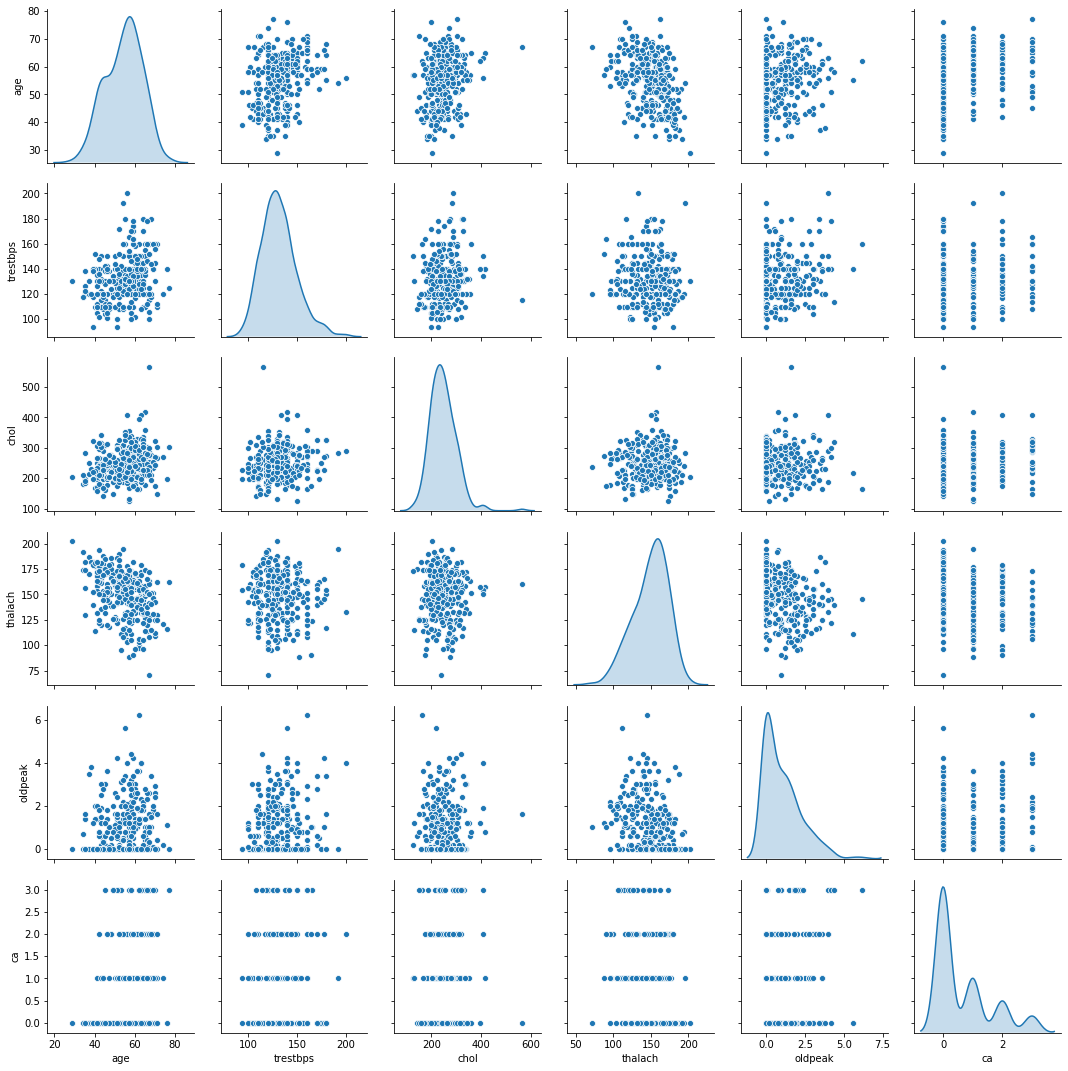

In [5]:
import seaborn as sns
dfnumeric = df.drop(categorias,axis=1)

sns.pairplot(dfnumeric, diag_kind='kde')

No se perciben correlaciones claras entre ningún par de variables. Aunque sí se se puede apreciar como la gente de mayor edad alcanza mayores valores en algunas variables, y, de forma ligeramente más destacable, menores pulsaciones de corazón. Consideramos aún así que no se puede prescindir de ninguna de estas variables porque la relación no parece lo suficientemente fuerte, pues hay mucha gente que pese a tener una edad avanzada obtiene valores similares a otros pacientes más jovenes.

Sin embargo, tal vez sería planteable prescindir de la variable 'edad', pues el envejecimiento en lo que al sistema cardiovascular respecta queda recogido entre las otras variables. En esta práctica probaremos a hacerlo de ambas formas y compararemos.

In [6]:
dfnumeric.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


Los coeficientes de correlación concuerdan con lo que la grafica nos sugiere. La correlación más alta se de entre la edad y las pulsaciones del corazón, de aproximadamente -0.39, y no llega a ser lo suficientemente alta como para justificar una dependencia lineal.

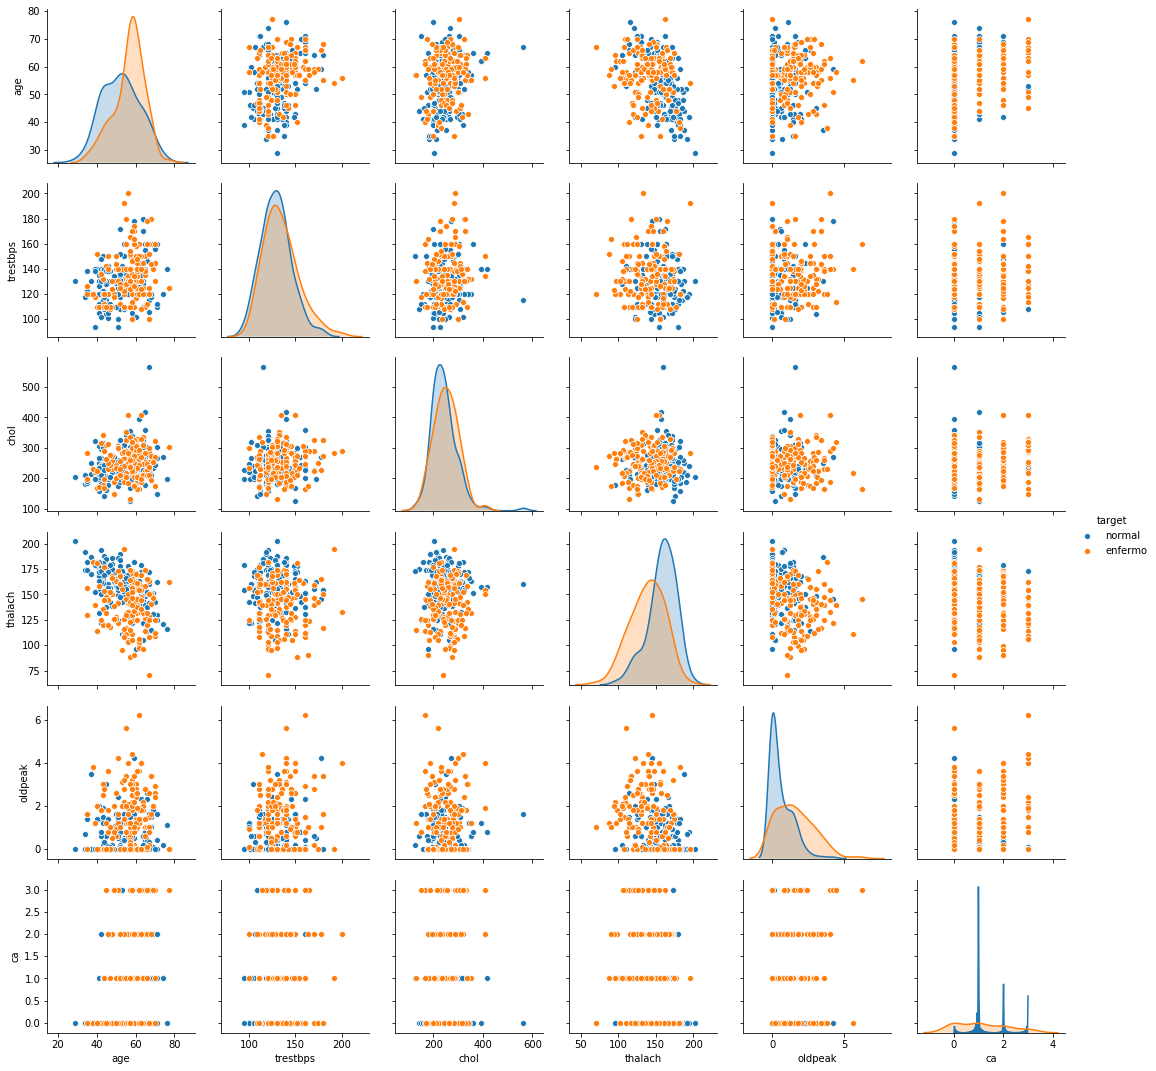

In [7]:
sns.pairplot(dfnumeric, diag_kind='kde', hue='target')

A priori pensamos que se trata de un problema complicado de resolver con precisión, la mayoría de las gráficas toman forma de aglomeración de puntos respecto a un centro, y ambas clases se encuentran solapadas sin haber una clara línea divisoria.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Para construir árboles de decisión no es necesario escalar los datos, pues trabaja con cada variable individualmente. El hecho de que las variables se midan en distintas escalas no va a afectar a que el algoritmo dé más valor a unas que a otras.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

RANDOM_STATE = 57

#Creamos arrays de numpy para poder trabajar con DecisionTreeClasifier
datos = df.drop('target',axis=1).to_numpy()
objetivos = df['target'].to_numpy()

In [9]:
from sklearn.model_selection import cross_validate
import numpy

precision_entrenamiento = []
precision_test = []
# Mediran la precision del clasificador en los sets de entrenamiento y prueba

# Entrenamos distintos arboles variando la profundidad maxima, mediante validacion cruzada
profundidades = range(1, 12)
for md in profundidades: 
    arbol = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(arbol, datos, objetivos, scoring='accuracy', cv=10, return_train_score=True)
    
    precision_entrenamiento.append(numpy.mean(scores['train_score']))
    precision_test.append(numpy.mean(scores['test_score']))
    

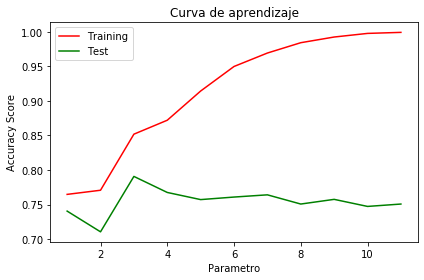

In [10]:
import matplotlib.pyplot as plt

# Dibujamos la curva de precision sobre sets de entrenamiento frente a la de sets de prueba

plt.plot(profundidades, precision_entrenamiento, color="r",  label="Training")
plt.plot(profundidades, precision_test, color="g", label="Test")

plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

En la gráfica observamos como el mejor nivel de profundidad para el árbol es 3. Vemos como a partir de ahí incrementan mucho los aciertos en el test de entrenamiento pero decaen los de prueba, mostrando un síntoma claro de sobreaprendizaje. Como la profundidad óptima es baja comparada con el número de variables, deducimos que algunas de éstas tienen mucha mayor importancia a la hora del diagnóstico.

In [11]:
precision_entrenamiento[3], precision_test[3]

(0.8720484655374812, 0.7674712643678161)

Probamos a hacer lo mismo variando el número mínimo de muestras para dividir un nodo, para compara resultados con lo anterior.

In [12]:
from sklearn.model_selection import cross_validate
import numpy

precision_entrenamiento = []
precision_test = []
# Mediran la precision del clasificador en los sets de entrenamiento y prueba

# Entrenamos distintos arboles variando el parametro min_samples_split
# Escogido este rango tras probar con otros
split = range(5, 40)
for s in split: 
    arbol = DecisionTreeClassifier(criterion="entropy", max_depth=12, min_samples_split=s, random_state=RANDOM_STATE)
    scores = cross_validate(arbol, datos, objetivos, scoring='accuracy', cv=10, return_train_score=True)
    
    precision_entrenamiento.append(numpy.mean(scores['train_score']))
    precision_test.append(numpy.mean(scores['test_score']))
    

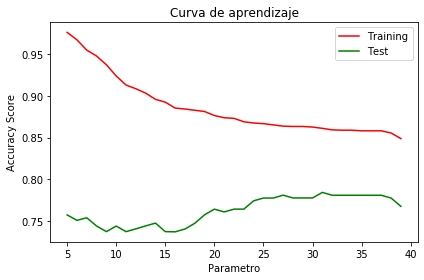

In [13]:
import matplotlib.pyplot as plt

# Dibujamos la curva de precision sobre sets de entrenamiento frente a la de sets de prueba

plt.plot(split, precision_entrenamiento, color="r",  label="Training")
plt.plot(split, precision_test, color="g", label="Test")

plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

El máximo se alcanza en el pico del 31.

In [14]:
precision_entrenamiento[31], precision_test[31]

(0.8582047627033372, 0.7808045977011494)

De esta segunda forma se mejoran ligeramente las predicciones sobre el conjunto de test, mientras que empeoran un poco las de entrenamiento.

Probablemente los parámetros óptimos sean un punto medio entre ambos resultados.

Para el resto de la práctica, nos quedaremos con la primera medida y repetimos el algoritmo con profundidad = 3.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

arbol = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
arbol.fit(datos, objetivos)

# Pintamos el árbol
plt.figure(figsize=(150,150))
plot_tree(arbol, filled=True,feature_names=df.columns, class_names=['enfermo','normal'])
plt.show()

Vemos como la variable mas determinante a la hora de determinar si el paciente está enfermo es el diagnóstico de talasemia(thal), seguida de el número de vasos sanguíneos coloreados en una fluoroscopia(ca). También forman parte de la decisión final en el nivel de profundidad previo a las hojas la edad, la sintomatología del paciente(cp), el dolor inducido por el ejercicio(exang) y los resultados del electrocardiograma(restecg).

Hay muchas variables sin usar, como veíamos en el gráfico inicial, muchas variables no separaban bien entre enfermos y sanos. También mencionamos anteriormente que por la poca profundidad del árbol, solo unas pocas variables jugarían el papel más relevante en el diagnóstico.

In [16]:
num_aciertos = 100+127
total = 297
accuracy = num_aciertos/total
accuracy

0.7643097643097643

Sorprendentemente, no empeora mucho con respecto a la tasa de aciertos del árbol completo, que era de 0'7674712643678161. Esto sigue reforzando la idea de que la mayoría de las variables ayudan poco a diagnosticar la enfermedad, o eso es al menos lo que sugiere esta pequeña muestra de datos.

Por todo lo mencionado anteriormente, el árbol obtenido es bastante impreciso y no logra separar correctamente las dos clases.

La hoja a la que llega con mayor confusión es la quinta en el dibujo, con una entropía de 0.918. De hecho, se equivoca una de cada tres veces.

In [17]:
accuracy = 22/33
accuracy

0.6666666666666666

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

scores = cross_validate(arbol, datos, objetivos, scoring=scoring_metrics, cv=10, return_train_score=False)


print('Precisión ponderada media: ',numpy.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',numpy.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',numpy.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


Vemos que no destaca particularmente en ninguna de las medidas, sino que son bastante similares. 

In [19]:
# Metricas por clase

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report


predictions = cross_val_predict(arbol, datos, objetivos, cv=10)

cr = classification_report(objetivos,predictions, target_names=['enfermo','sano'])
print(cr)

              precision    recall  f1-score   support

     enfermo       0.82      0.71      0.76       137
        sano       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [20]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [21]:
def toInt (v) :
    sol = list()
    for elem in v :
        if elem == 'normal':
            sol.append(1)
        else :
            sol.append(0)
    return numpy.array(sol)

Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


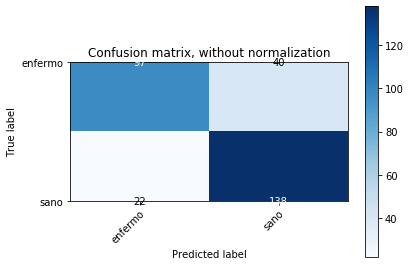

In [22]:
plot_confusion_matrix(toInt(objetivos), toInt(predictions), numpy.array(['enfermo','sano']), normalize=False)

El algoritmo es más fiable si da una respuesta negativa(sano) que afirmativa, pero esto no prueba nada, pues un algoritmo que siempre devuelve sano alcanzaría un 100% en esta métrica.

De todos los pacientes sanos, el arbol acierta con el 86%, diagnosticando una enfermedad que realmente no tienen a un 14% de las personas sanas. Esto puede ser un grave problema según cual sea el tratamiento de la enfermedad. Peor es el caso opuesto, donde un 29% de los pacientes que necesitarían dicho tratamiento se quedarían sin él si se aplica estrictamente el algoritmo. 

Consideramos que es, por tanto, un algoritmo de poca fiabilidad, que tal vez en otro campo pueda ser útil, pero cuando está en juego la salud de las personas ni por asomo nos debemos conformar con una eficacia por el estilo. Es mejor que sea un médico con conocimiento y experiencia en la materia, el que en funcion de los resultados en las pruebas, y la descripción de la sintomatología del paciente, decida si se deben realizar más pruebas o no antes de decidir una respuesta. 

No obstante, el análisis del árbol por un experto sí puede resultar útil, sobre todo para saber que pruebas es más recomendable realizar al paciente, o a qué síntomas hay que dar más importancia y a cuales menos, por ser mas decisivas a la hora de determinar si el paciente tiene o no la enfermedad.


Finalmente queremos añadir que tal vez con una base de datos mucho más amplia y que alcance mejores valores en estas métricas, se podría llegar a utilizar el algoritmo como herramienta de ayuda para los médicos, siempre siendo una persona con los estudios necesarios la que tome la decisión final.

__Extra: Probamos a crear el árbol prescindiendo de la variable edad__

In [23]:
midf = df.drop('age',axis=1)

#Creamos arrays de numpy para poder trabajar con DecisionTreeClasifier
datos = midf.drop('target',axis=1).to_numpy()
objetivos = midf['target'].to_numpy()

In [24]:
precision_entrenamiento = []
precision_test = []
# Mediran la precision del clasificador en los sets de entrenamiento y prueba

# Entrenamos distintos arboles variando la profundidad maxima, mediante validacion cruzada
profundidades = range(1, 12)
for md in profundidades: 
    arbol = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(arbol, datos, objetivos, scoring='accuracy', cv=10, return_train_score=True)
    
    precision_entrenamiento.append(numpy.mean(scores['train_score']))
    precision_test.append(numpy.mean(scores['test_score']))
    

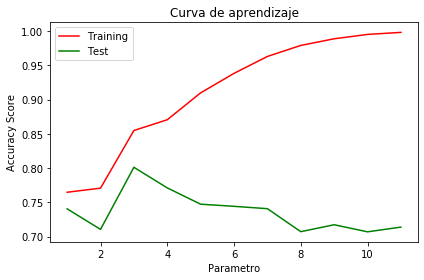

In [25]:
plt.plot(profundidades, precision_entrenamiento, color="r",  label="Training")
plt.plot(profundidades, precision_test, color="g", label="Test")

plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

In [26]:
precision_entrenamiento[3], precision_test[3]

(0.8705531332103528, 0.7710344827586207)

Como habíamos predicho, se produce una ligera mejoría de los resultados, pero tan solo en un 0.01, no cual no nos parece suficiente como para justificar que en el caso general se deba prescindir de la edad como parámatro a tener en cuenta.